# Julia- Linear Algebra 
---

In this more math-centric notebook, we will understand how you can leverage Julia to perform all sorts of algrbraic operations, that are a key to a bunch of operations involved in Data Science.

## Importing Dependencies
---

Here are some of the important modules in Julia:

* __LinearAlgebra__: As the name suggests, it provides a set of very powerful linear algrebra functions.
* __SparseArrays__: Another popular linear algrbra module in Julia
* __Images__: Used for handling image data

In [1]:
using LinearAlgebra
using SparseArrays
using Images
using MAT

For checking the documentation associated with any module or any methods associated with the module, use the '?' help operator.

In [2]:
?LinearAlgebra

search: LinearAlgebra



Linear algebra module. Provides array arithmetic, matrix factorizations and other linear algebra related functionality.


Now let us see how we can create some arrays using the `LinearAlgebra` module.

In [3]:
# creating a matrix of random numbers
arr1 = rand(3,5)

3×5 Array{Float64,2}:
 0.0503646  0.155512  0.577725   0.963297  0.937166
 0.0120778  0.718866  0.883296   0.235749  0.395396
 0.680275   0.638968  0.0346907  0.209964  0.743976

In [4]:
# creating a matrix of random numbers from standard normal dist
arr2 = randn(5,5)

5×5 Array{Float64,2}:
  0.515363   0.622302   0.885074   0.558054    0.599442
  0.290883   0.114417   0.122719  -0.0807835   0.234969
 -0.114131  -0.305748  -0.402179   1.96559     0.7916
  1.08728    1.09903   -2.46642    0.173639   -0.769735
 -1.25859    1.73471   -0.488605  -0.50532    -1.66425

Now let us have a look at some of the basic matrix operations that you can perform on matrices/vectors using `LinearAlgebra`.

In [5]:
# transpose of a matrix
arr1_T = arr1'

5×3 Adjoint{Float64,Array{Float64,2}}:
 0.0503646  0.0120778  0.680275
 0.155512   0.718866   0.638968
 0.577725   0.883296   0.0346907
 0.963297   0.235749   0.209964
 0.937166   0.395396   0.743976

In [6]:
# transpose of a vector
vec1 = randn(10)
vec1_T = vec1'

1×10 Adjoint{Float64,Array{Float64,1}}:
 0.744531  1.24648  0.278622  -1.002  …  -0.486176  -0.149651  -2.77203

In [7]:
# inverse of a matrix
arr2_inv = inv(arr2)

# checking if it's an inverse
norm(arr2_inv * arr2 - I(5))

1.4140230546698247e-15

As we can see, the norm of the matrx __A<sup>-</sup> * A__ and __I__ (identity matrix) is a negligible number.

In [8]:
# for a real valued matrix, adjoint == transpose
adjoint(arr1) == transpose(arr1)

true

Now let us have a look at some of the matrix multiplication operations.

In [9]:
A = rand(5,5)
x = rand(5,4);

In [10]:
B = A * x

5×4 Array{Float64,2}:
 1.2572   0.918384  0.664623  0.988358
 1.24894  0.428775  0.719935  1.20151
 1.7001   1.16964   0.632424  1.18857
 1.61021  0.965543  0.654182  1.42674
 2.66382  1.50645   1.14297   2.28597

In [11]:
# will result in error 
# if n_columns of first matrix != n_rows of second matrix
y = rand(6,4)
C = A * y

LoadError: DimensionMismatch("A has dimensions (5,5) but B has dimensions (6,4)")

Now let us see a very powerful operator in Julia— The backslash or inversed division operator (\).

In [12]:
X = A \ B  # inv(A) * A * x = inv(A) * B => x = inv(A) * B

5×4 Array{Float64,2}:
 0.384768  0.819998   0.126587   0.149781
 0.840823  0.0251846  0.850153   0.402006
 0.876063  0.625266   0.0383106  0.674816
 0.606736  0.130834   0.172516   0.787349
 0.641717  0.42325    0.374203   0.737234

In [13]:
# norm of the matrices tends to 0
norm(X - x)

1.0662287867682772e-14

The inverse division operator can be used to solve matrices quickly. In case the matrix A is not invertible, the solution obtained by the inverse division will be such that the norm of x - x_calc will be minimum.

Now let us have a look at the different kinds of factorizations using the `LinearAlgebra` module.

#### 1. LU Decomposition
---

Note- True LU (or LDU) decomposition is only possible for square matrices that are invertible, and have all the leading minors as 0. On the other hand, all the square matrices can be factorized into the PLU form.  

Therefore, LU factorization can be expressed in the form of a linear equation as:
`A = P.L.U`

Now let us see how you can perform LU factorization using Julia.

In [14]:
A = rand(4, 4)

4×4 Array{Float64,2}:
 0.436025  0.658368  0.898027  0.987269
 0.7723    0.804521  0.492157  0.0602571
 0.30674   0.918718  0.184598  0.0114617
 0.773294  0.515503  0.626364  0.514763

In [15]:
# performing LU factorization on A
LuA = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
4×4 Array{Float64,2}:
 1.0       0.0        0.0       0.0
 0.396666  1.0        0.0       0.0
 0.563854  0.514815   1.0       0.0
 0.998714  0.405581  -0.186078  1.0
U factor:
4×4 Array{Float64,2}:
 0.773294  0.515503   0.626364    0.514763
 0.0       0.714235  -0.0638588  -0.192727
 0.0       0.0        0.577724    0.796237
 0.0       0.0        0.0        -0.227515

In [16]:
# verifying if the factorization was successful by checking the norn
norm(LuA.P*A - LuA.L*LuA.U)

1.2412670766236366e-16

As you can see, the norm tends to approach 0 (Not Exactly 0 due to machine precision).

#### 2. QR Factorization
---

QR factorization can be used to factorize a rectangular matrix. 
Here A is the matrix of size m x n that we wish to decompose, Q a matrix with the size m x m, and R is an upper triangle matrix with the size m x n.

The QR factorization can be expressed in terms of an algebraic equation as follows:
`A = QR`
This is how you can perform the factorization using Julia:

In [17]:
# creating a rectangular 4x5 array 
B = rand(4, 5)

4×5 Array{Float64,2}:
 0.64547   0.118113  0.58433      0.916534   0.280963
 0.264324  0.24908   0.932461     0.165413   0.14892
 0.884674  0.566623  0.171882     0.0335131  0.8562
 0.715573  0.65844   0.000789886  0.253469   0.875299

In [18]:
# performing QR decomposition
qrB = qr(B)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
4×4 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.483639   0.782906    0.127667   0.369936
 -0.198053  -0.22928     0.947659  -0.100736
 -0.662869  -0.0358111  -0.223079  -0.713833
 -0.536165  -0.57724    -0.189418   0.586039
R factor:
4×5 Array{Float64,2}:
 -1.33461  -0.835084  -0.58164   -0.634148  -1.20223
  0.0      -0.365007   0.23707    0.532121  -0.350096
  0.0       0.0        0.919762   0.218279  -0.179802
  0.0       0.0        0.0        0.447016  -0.00928789

In [19]:
# checking if the factorization was successfully performed
norm(qrB.Q*qrB.R - B)

8.101585801848734e-16

Once again, as we can see, the norm came out to be almost zero, due to the machine precision. Hence, this confirms that the factorization was a valid one.

#### 3. Cholesky Factorization
---

One this to note is that for a matrix to be Cholesky-factorizable, it needs to be a positive definite matrix. 

```
Cholesky factorization decomposses a matrix A into two parts:
  1. A lower triangular matrix L
  2. A conjugate transpose of matrix L, L* 

This can be expressed algebraicly as:
  A = LL*
```

Let us see how we can perform Cholesky factorization using Julia.

In [20]:
# defining a matrix C
C = rand(5, 5)
C = C*C'

5×5 Array{Float64,2}:
 1.17362  1.1941   1.0123    1.01826   1.17151
 1.1941   1.99291  1.1245    1.25196   1.45733
 1.0123   1.1245   1.46318   0.981734  0.752031
 1.01826  1.25196  0.981734  1.19466   1.19974
 1.17151  1.45733  0.752031  1.19974   1.55381

In [21]:
# checking if the defined matrix is a positive definite matrix
isposdef(C)

true

In [22]:
# performing cholesky factorization
cholC = cholesky(C)

Cholesky{Float64,Array{Float64,2}}
U factor:
5×5 UpperTriangular{Float64,Array{Float64,2}}:
 1.08334  1.10224   0.934432  0.939932   1.08139
  ⋅       0.882024  0.107166  0.24481    0.300876
  ⋅        ⋅        0.760613  0.101493  -0.382186
  ⋅        ⋅         ⋅        0.490873   0.302391
  ⋅        ⋅         ⋅         ⋅         0.237443

In [23]:
# checking if the factorization was successful
norm(cholC.L * cholC.U - C)

2.220446049250313e-16

As we can see, the factorization was successful. The reason is because the norm almost tends to 0 (not exactly 0 due to computer precision).

Now we are going to have a look at one-method-do-all factorization function in Julia that automatically detects the kind of matrix that you are using, then performs the best suitable factorization for that given matrix. 

> One quirk here is that since the matrix will be evaluated on various parameters for deciding the most suitable factorization, this method tends to be generally slower than when you manually define the kind of factorization that you want. So, it's faster to know what is the best suitable factorization for a given matrix than letting Julia decide on its own. 

#### 4. Factorize Method
---

Let's just simply take a look at the `factorize()` method's documentation to see how it works. 

In [24]:
?factorize

search: factorize Factorization factorial



```
factorize(A)
```

Compute a convenient factorization of `A`, based upon the type of the input matrix. `factorize` checks `A` to see if it is symmetric/triangular/etc. if `A` is passed as a generic matrix. `factorize` checks every element of `A` to verify/rule out each property. It will short-circuit as soon as it can rule out symmetry/triangular structure. The return value can be reused for efficient solving of multiple systems. For example: `A=factorize(A); x=A\b; y=A\C`.

| Properties of `A`          | type of factorization                      |
|:-------------------------- |:------------------------------------------ |
| Positive-definite          | Cholesky (see [`cholesky`](@ref))          |
| Dense Symmetric/Hermitian  | Bunch-Kaufman (see [`bunchkaufman`](@ref)) |
| Sparse Symmetric/Hermitian | LDLt (see [`ldlt`](@ref))                  |
| Triangular                 | Triangular                                 |
| Diagonal                   | Diagonal                                   |
| Bidiagonal                 | Bidiagonal                                 |
| Tridiagonal                | LU (see [`lu`](@ref))                      |
| Symmetric real tridiagonal | LDLt (see [`ldlt`](@ref))                  |
| General square             | LU (see [`lu`](@ref))                      |
| General non-square         | QR (see [`qr`](@ref))                      |

If `factorize` is called on a Hermitian positive-definite matrix, for instance, then `factorize` will return a Cholesky factorization.

# Examples

```jldoctest
julia> A = Array(Bidiagonal(fill(1.0, (5, 5)), :U))
5×5 Array{Float64,2}:
 1.0  1.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0

julia> factorize(A) # factorize will check to see that A is already factorized
5×5 Bidiagonal{Float64,Array{Float64,1}}:
 1.0  1.0   ⋅    ⋅    ⋅
  ⋅   1.0  1.0   ⋅    ⋅
  ⋅    ⋅   1.0  1.0   ⋅
  ⋅    ⋅    ⋅   1.0  1.0
  ⋅    ⋅    ⋅    ⋅   1.0
```

This returns a `5×5 Bidiagonal{Float64}`, which can now be passed to other linear algebra functions (e.g. eigensolvers) which will use specialized methods for `Bidiagonal` types.


Now that we have seen how to work with matrices and perform different kinds of linear algrbra operations, let us now see one of the most important uses of matrix algebra in Machine Learning— working with images.

## Images
---

Images can be expressed in terms of a matrix, with each value inside the matrix representing a pixel value. 

The first thing that we are going to do is load an image. For this, we will be using the `load` function. Let us have a look at the documentation of the `load` method.

In [25]:
?load

search: load LoadError LOAD_PATH download unsafe_load logabsdet lowrankdowndate



  * `load(filename)` loads the contents of a formatted file, trying to infer

the format from `filename` and/or magic bytes in the file.

  * `load(strm)` loads from an `IOStream` or similar object. In this case,

there is no filename extension, so we rely on the magic bytes for format identification.

  * `load(File(format"PNG", filename))` specifies the format directly, and bypasses inference.
  * `load(Stream(format"PNG", io))` specifies the format directly, and bypasses inference.
  * `load(f; options...)` passes keyword arguments on to the loader.


Now, let us import our image.

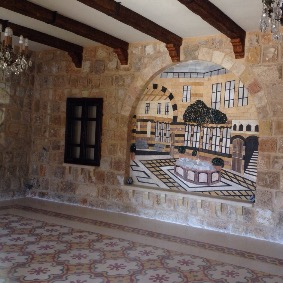

In [27]:
# loading the image
X = load("./data/khiam-small.jpg")